1. Завантажте дані, перевірте кількість спостережень і стовпців, типи даних, наявність пропущених значень, які унікальні значення зустрічаються. Скільки унікальних рекламних кампаній було проведено?

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import iqr
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/Aranaur/aranaur.rbind.io/main/datasets/conversion/conversion.csv'
data = pd.read_csv(url)

print(f"Розмір набору даних: {data.shape}") # кількість спостережень і стовпців

print(data.info()) # перевірка типів даних і наявність пропущених значень

print(data.nunique()) # перевірка кількості унікальних значень для кожної колонки

print(f"Унікальних рекламних кампаній (xyz_campaign_id): {data['xyz_campaign_id'].nunique()}") # перевірка кількості унікальних рекламних кампаній

Розмір набору даних: (1143, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB
None
ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
int

2. Розподіл змінних за типами: дискретні, номінативні, неперервні, рангові

In [9]:
discrete = ['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'interest', 'Clicks', 'Total_Conversion', 'Approved_Conversion']
nominal = ['gender']
continuous = ['Impressions', 'Spent']
ordinal = ['age']

print(f"Дискретні змінні: {discrete}")
print(f"Номінативні змінні: {nominal}")
print(f"Неперервні змінні: {continuous}")
print(f"Рангові змінні: {ordinal}")

Дискретні змінні: ['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'interest', 'Clicks', 'Total_Conversion', 'Approved_Conversion']
Номінативні змінні: ['gender']
Неперервні змінні: ['Impressions', 'Spent']
Рангові змінні: ['age']


3. Побудуйте графік розподілу числа показів (Impressions) для кожної реклами, прологарифмувавши значення. Які твердження є правдивими:

    • Розподіл унімодальний

    • Розподіл бімодальний
    
    • Отриманий розподіл не є нормальним
    
    • Розподіл симетричний
    
    • Отриманий розподіл є нормальним

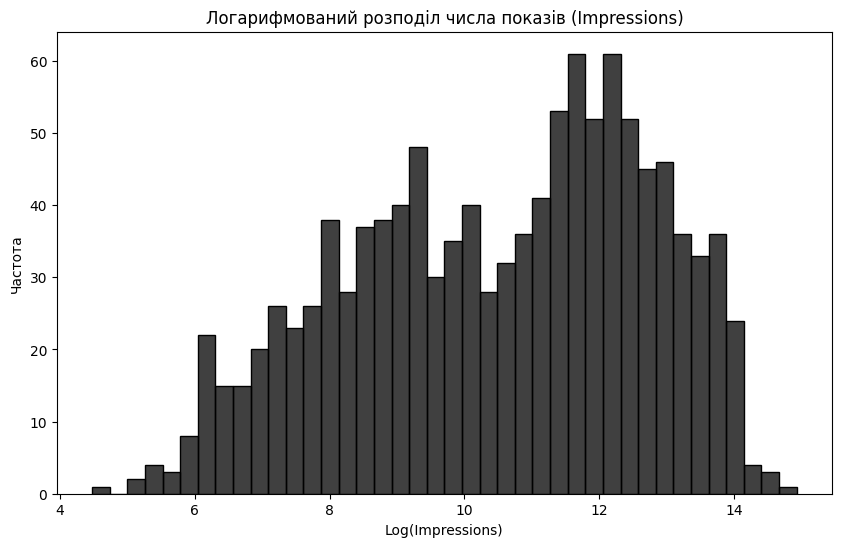

Висновок: Розподіл є унімодальним, але не є нормальним, тому що він має зміщення в бік менших значень.


In [3]:
import matplotlib.pyplot as plt
import numpy as np

data['log_impressions'] = np.log(data['Impressions'] + 1) # логарифмування числа показів

plt.figure(figsize=(10,6))
sns.histplot(np.log(data['Impressions'] + 1), bins=40, color='black')
plt.title('Логарифмований розподіл числа показів (Impressions)')
plt.xlabel('Log(Impressions)')
plt.ylabel('Частота')
plt.show()

print("Висновок: Розподіл є унімодальним, але не є нормальним, тому що він має зміщення в бік менших значень.")

4. Створіть нову змінну з CTR (click-through rate), тобто відношення кількості кліків до кількості показів: 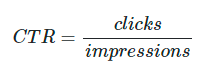

In [4]:
data['CTR'] = data['Clicks'] / data['Impressions'] # ініціалізація змінної CTR

print(data['CTR'].describe()) # статистика для CTR

max_ctr_ad_id = data.loc[data['CTR'].idxmax(), 'ad_id']
print(f"Оголошення з найбільшим CTR: {max_ctr_ad_id}")

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: CTR, dtype: float64
Оголошення з найбільшим CTR: 738637


5. Візуалізуйте CTR із розбивкою за номером рекламної кампанії (xyz_campaign_id). Якому графіку відповідає розподіл CTR кампанії 916?

C:\Users\Dima\AppData\Local\Temp\ipykernel_15556\1148515231.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='xyz_campaign_id', y='CTR', data=data, estimator=np.mean, ci=None, palette='Blues_d')
C:\Users\Dima\AppData\Local\Temp\ipykernel_15556\1148515231.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='xyz_campaign_id', y='CTR', data=data, estimator=np.mean, ci=None, palette='Blues_d')


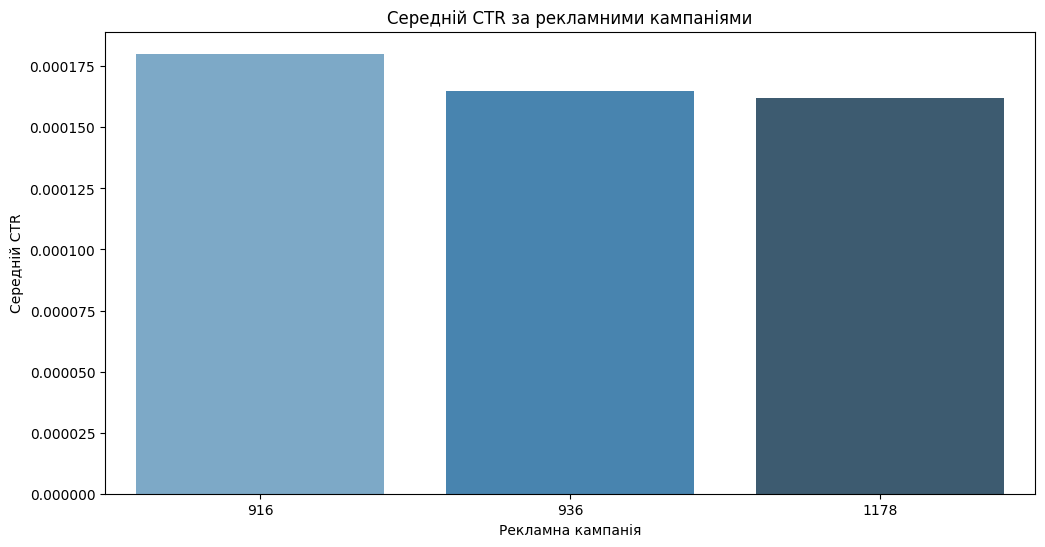

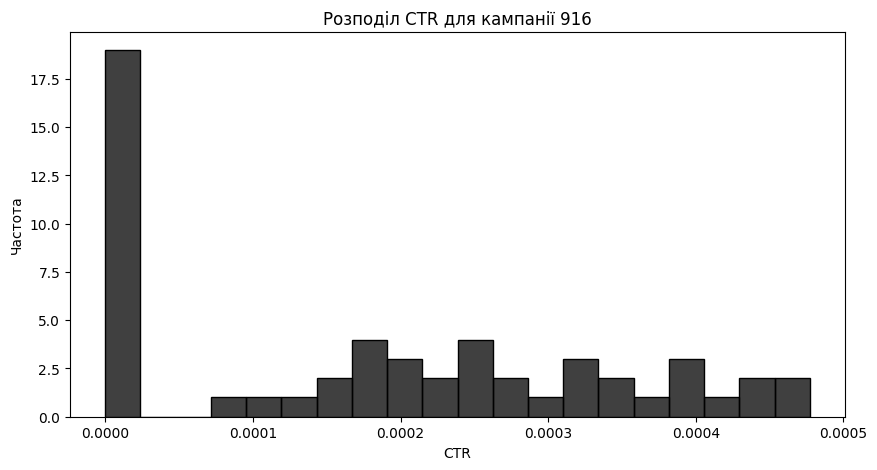

Якому графіку відповідає розподіл CTR кампанії 916?
Відповідь: Графік С


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x='xyz_campaign_id', y='CTR', data=data, estimator=np.mean, ci=None, palette='Blues_d')
plt.title('Середній CTR за рекламними кампаніями')
plt.xlabel('Рекламна кампанія')
plt.ylabel('Середній CTR')
plt.show()

# розподіл для кампанії 916
campaign_916 = data[data['xyz_campaign_id'] == 916]
plt.figure(figsize=(10,5))
sns.histplot(campaign_916['CTR'], bins=20, color='black')
plt.title('Розподіл CTR для кампанії 916')
plt.xlabel('CTR')
plt.ylabel('Частота')
plt.show()

print(f"Якому графіку відповідає розподіл CTR кампанії 916?")
print(f"Відповідь: Графік С")

6. CPC (cost-per-click) — вартість за клік користувача по оголошенню. Розраховується шляхом ділення суми витрачених грошей на загальне число кліків: 

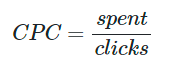

Виведіть описові статистики для нової змінної, подивіться на форму розподілу. Розрахуйте міжквартильний розмах, округлений до двох знаків після крапки.

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64
Міжквартильний розмах CPC: 0.25


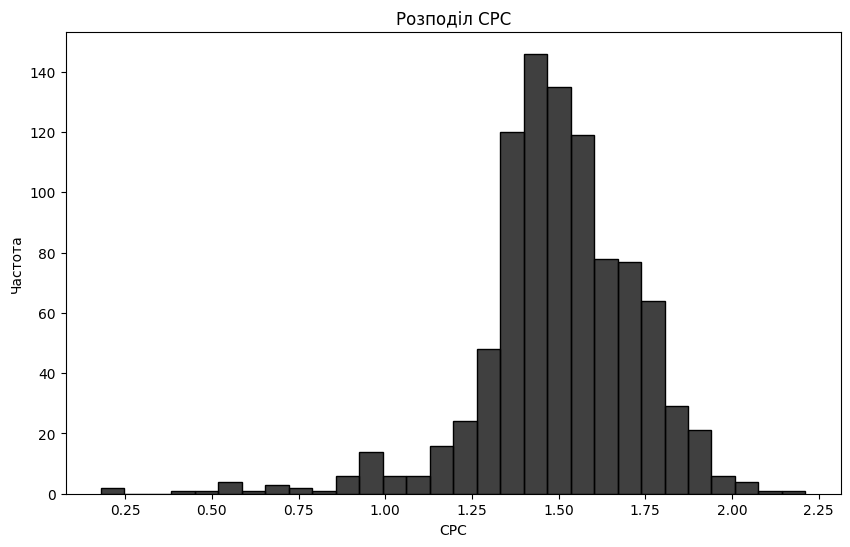

In [6]:
data['CPC'] = data['Spent'] / data['Clicks'] # ініціалізація змінної CPC

data['CPC'] = data['CPC'].replace([np.inf, -np.inf], np.nan) # заміна НАНів та безкінченних числ

print(data['CPC'].describe()) # статистика для CPC

cpc_iqr = iqr(data['CPC'].dropna(), nan_policy='omit') #міжквартильний розмах, округлений до двох знаків після крапки
print(f"Міжквартильний розмах CPC: {round(cpc_iqr, 2)}")

plt.figure(figsize=(10,6))
sns.histplot(data['CPC'].dropna(), bins=30, color='black')
plt.title('Розподіл CPC')
plt.xlabel('CPC')
plt.ylabel('Частота')
plt.show()

7. Візуалізуйте CPC з розбивкою за статтю користувачів, яким були показані оголошення.

C:\Users\Dima\AppData\Local\Temp\ipykernel_15556\285576702.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='CPC', data=data, estimator=np.mean, palette='Blues_d')


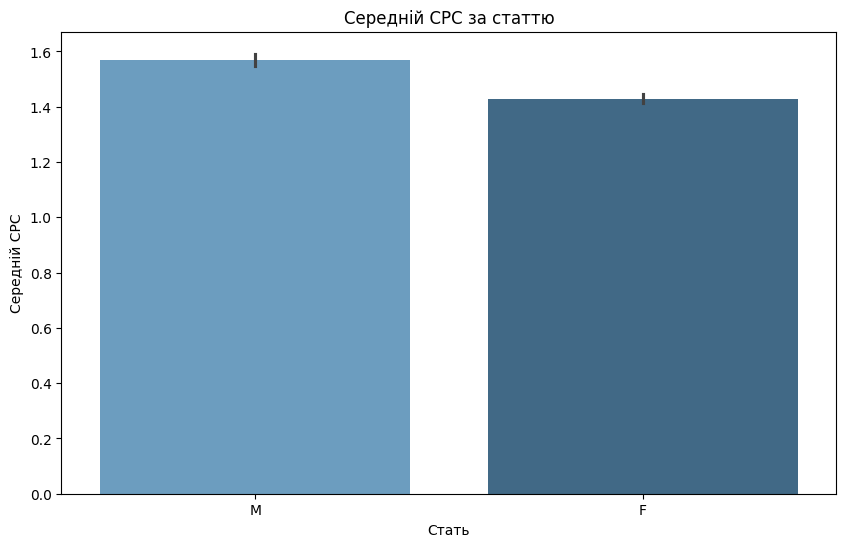

Висновок: Чоловічий клік - дорожчий, чоловіки мають більшу варіативність у CPC, але обидві статі мають схожі медіанні значення.


In [7]:
plt.figure(figsize=(10,6))
sns.barplot(x='gender', y='CPC', data=data, estimator=np.mean, palette='Blues_d')
plt.title('Середній CPC за статтю')
plt.xlabel('Стать')
plt.ylabel('Середній CPC')
plt.show()

print("Висновок: Чоловічий клік - дорожчий, чоловіки мають більшу варіативність у CPC, але обидві статі мають схожі медіанні значення.")

8. Конверсія (conversion rate) — відношення числа користувачів, які вчинили цільову дію на певному етапі, до загальної кількості тих, хто дійшов до цього етапу. Порахуйте конверсію з кліка в покупку. Як відповідь вкажіть конверсію для оголошення 1121814 у відсотках, округливши значення до 2 знаків після крапки. Наприклад, якщо значення кліків дорівнює 10, а покупок - 2, то CR на цьому етапі становить 2/10=0.2=20.

In [8]:
ad_1121814 = data[data['ad_id'] == 1121814]

clicks = ad_1121814['Clicks'].sum()
approved_conversions = ad_1121814['Approved_Conversion'].sum()

# конверсія з кліка в покупку
if clicks > 0:
    conversion_rate = (approved_conversions / clicks) * 100
else:
    conversion_rate = 0

print(f"Конверсія для оголошення 1121814: {conversion_rate:.2f}%")

Конверсія для оголошення 1121814: 3.09%


Це означає, що із всіх користувачів, які клікнули на оголошення, приблизно 3.09% здійснили покупку.